In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-10-09 14:14:29--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.207, 142.251.120.207, 142.251.161.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  88.1MB/s    in 2.2s    

2023-10-09 14:14:31 (88.1 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-10-09 14:14:32--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.207, 142.251.120.207, 142.251.161.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps

In [2]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [3]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-028.png', 'rock05ck01-016.png', 'rock03-058.png', 'rock05ck01-082.png', 'rock01-108.png', 'rock03-094.png', 'rock06ck02-109.png', 'rock01-055.png', 'rock05ck01-070.png', 'rock04-070.png']
['paper05-017.png', 'paper04-113.png', 'paper03-047.png', 'paper03-004.png', 'paper05-107.png', 'paper01-044.png', 'paper03-063.png', 'paper05-069.png', 'paper07-054.png', 'paper04-063.png']
['testscissors02-006.png', 'scissors02-010.png', 'testscissors02-083.png', 'scissors04-036.png', 'scissors04-112.png', 'scissors02-095.png', 'testscissors03-103.png', 'scissors03-087.png', 'scissors03-092.png', 'scissors02-084.png']


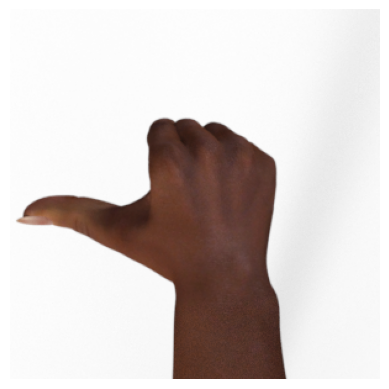

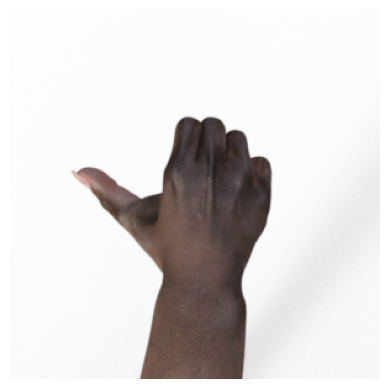

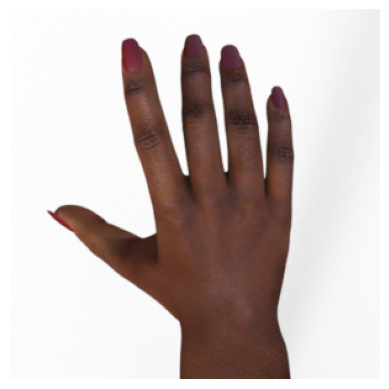

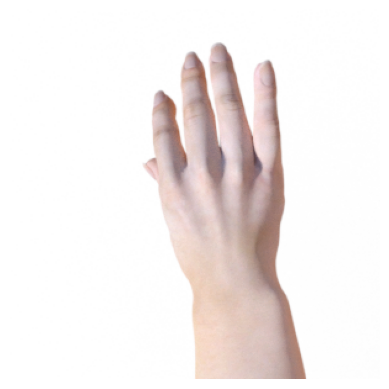

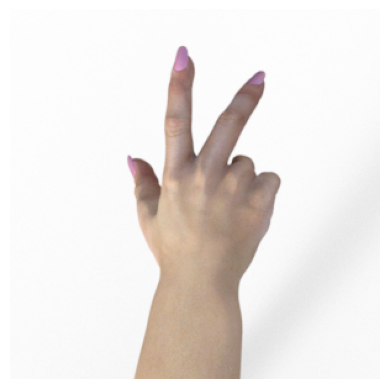

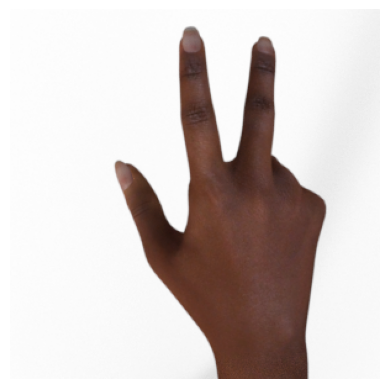

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 2)

Epoch 1/25
20/20 - 223s - loss: 1.1627 - accuracy: 0.3254 - val_loss: 1.0952 - val_accuracy: 0.3333 - 223s/epoch - 11s/step
Epoch 2/25
20/20 - 225s - loss: 1.1090 - accuracy: 0.3611 - val_loss: 1.1059 - val_accuracy: 0.3333 - 225s/epoch - 11s/step
Epoch 3/25
20/20 - 217s - loss: 1.0924 - accuracy: 0.3774 - val_loss: 1.0544 - val_accuracy: 0.5161 - 217s/epoch - 11s/step
Epoch 4/25
20/20 - 227s - loss: 1.0662 - accuracy: 0.4472 - val_loss: 1.0640 - val_accuracy: 0.5027 - 227s/epoch - 11s/step
Epoch 5/25
20/20 - 214s - loss: 0.9797 - accuracy: 0.5067 - val_loss: 0.7606 - val_accuracy: 0.5457 - 214s/epoch - 11s/step
Epoch 6/25
20/20 - 215s - loss: 0.8970 - accuracy: 0.5825 - val_loss: 0.4765 - val_accuracy: 0.6452 - 215s/epoch - 11s/step
Epoch 7/25
20/20 - 219s - loss: 0.7562 - accuracy: 0.6520 - val_loss: 0.4085 - val_accuracy: 0.9355 - 219s/epoch - 11s/step
Epoch 8/25
20/20 - 217s - loss: 0.6596 - accuracy: 0.7187 - val_loss: 0.6155 - val_accuracy: 0.6962 - 217s/epoch - 11s/step
Epoch 9/

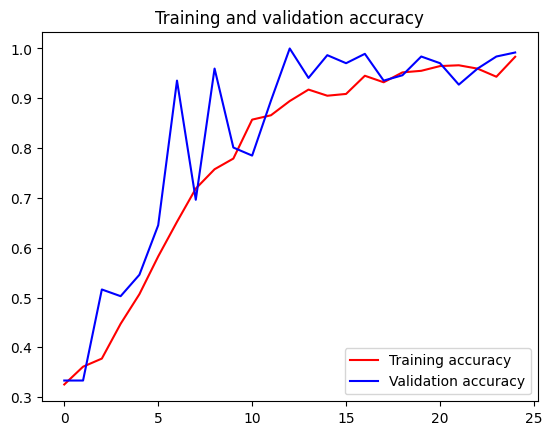

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Savi